In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CreditRisk-1.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].fillna('Not Mentioned',inplace=True)

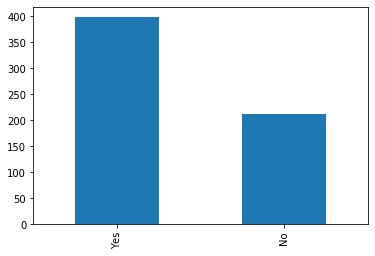

In [7]:
df['Married'].value_counts().plot(kind='bar')

In [9]:
df['Married'].fillna('Not Mentioned',inplace=True)

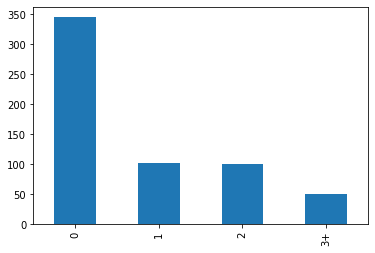

In [10]:
df['Dependents'].value_counts().plot(kind='bar')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [13]:
df['Dependents'].fillna('0',inplace=True)

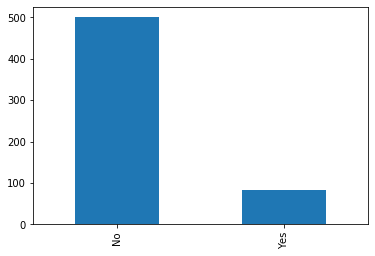

In [14]:
df['Self_Employed'].value_counts().plot(kind='bar')

In [19]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [21]:
df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [22]:
df.drop('Loan_Amount_Term',axis=1,inplace=True)

In [24]:
df['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 57.7+ KB


In [26]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Start EDA

In [30]:
df.drop('Loan_ID',axis=1,inplace=True)

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


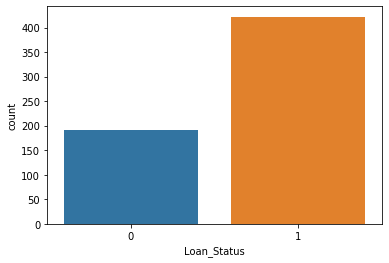

In [32]:
sns.countplot(df['Loan_Status'])

In [33]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [35]:
df['Loan_Status'].value_counts(normalize=True)  # The target variable is imbalanced as 1s are 69% and 0s are 31%

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 52.9+ KB


In [38]:
#Categorical Features - Gender, married, Dependents, Education, Self_employed, Property_Area

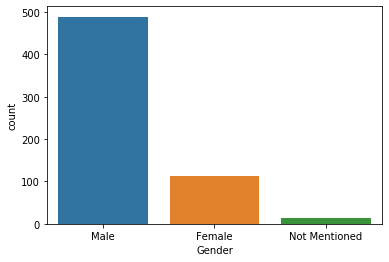

In [39]:
sns.countplot(df['Gender'])

In [40]:
df['Gender'].replace({'Not Mentioned':df['Gender'].mode()[0]},inplace=True)

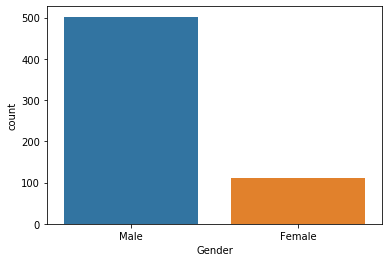

In [41]:
sns.countplot(df['Gender'])

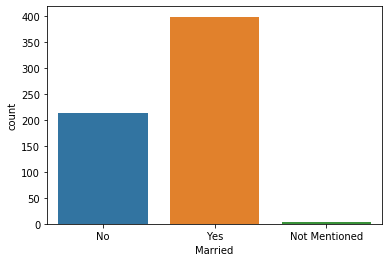

In [42]:
sns.countplot(df['Married'])

In [43]:
df['Married'].replace({'Not Mentioned':df['Married'].mode()[0]},inplace=True)

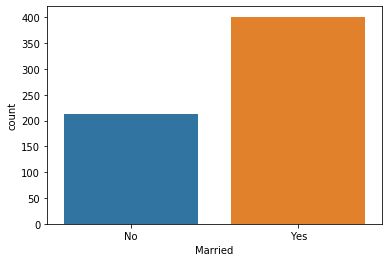

In [44]:
sns.countplot(df['Married'])

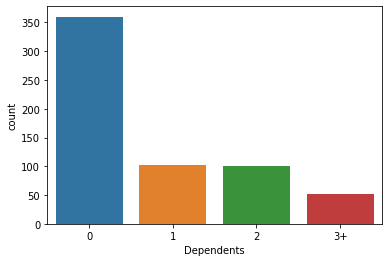

In [46]:
sns.countplot(df['Dependents'])

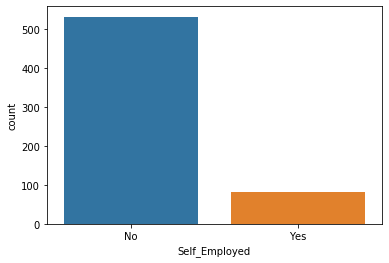

In [47]:
sns.countplot(df['Self_Employed'])

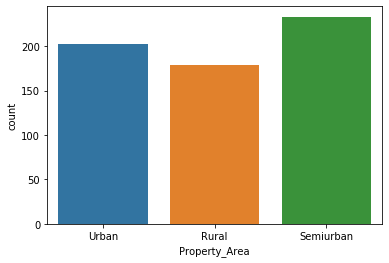

In [48]:
sns.countplot(df['Property_Area'])

In [53]:
#numerical feature - ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History , Loan_Status 

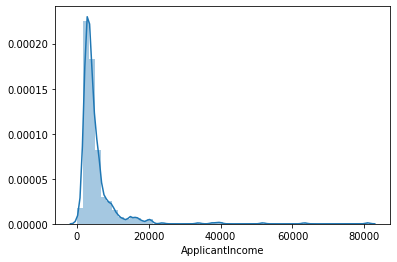

In [52]:
sns.distplot(df['ApplicantIncome'])

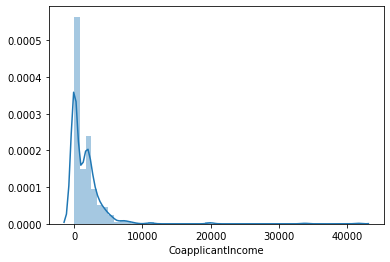

In [54]:
sns.distplot(df['CoapplicantIncome'])

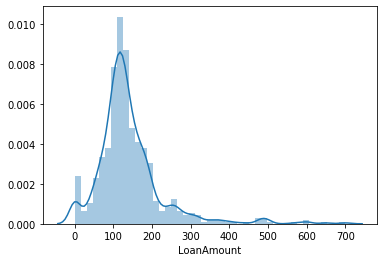

In [56]:
sns.distplot(df['LoanAmount'])

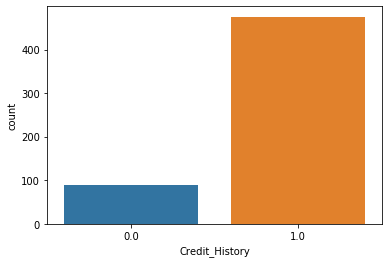

In [58]:
sns.countplot(df['Credit_History'])

In [60]:
df['Credit_History'].fillna(1.0,inplace=True)

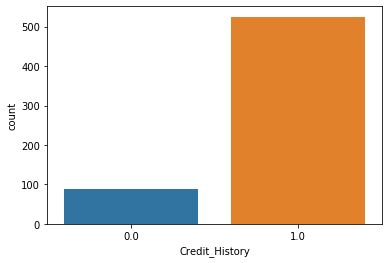

In [61]:
sns.countplot(df['Credit_History'])

In [62]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
#Multivariate Analysis

In [64]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.538290,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190377,0.011134,-0.059187
LoanAmount,0.538290,0.190377,1.000000,0.004863,-0.010631
Credit_History,-0.018615,0.011134,0.004863,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.010631,0.540556,1.000000


In [65]:
# If two independent features are strongly correlated with each other, we can drop one of two which is less correlated with target variable.

In [66]:
corr = df.corr()
corr[(corr>0.5) | (corr<-0.4)]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
ApplicantIncome,1.00000,NaN,0.53829,NaN,NaN
CoapplicantIncome,NaN,1.0,NaN,NaN,NaN
LoanAmount,0.53829,NaN,1.00000,NaN,NaN
Credit_History,NaN,NaN,NaN,1.000000,0.540556
Loan_Status,NaN,NaN,NaN,0.540556,1.000000


In [67]:
income = df['ApplicantIncome'].apply(np.log)

In [70]:
df['ApplicantIncome'].skew()

6.539513113994625

In [69]:
income.skew()

0.4795799780016222

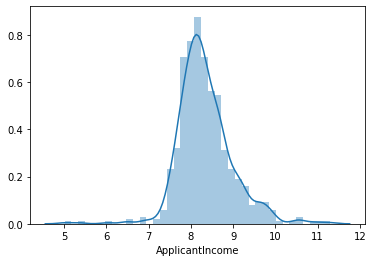

In [68]:
sns.distplot(income)

In [71]:
df['ApplicantIncome'] = income

In [72]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,8.430109,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,8.699515,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,8.320205,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8.996157,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,8.933664,0.0,187,1.0,Urban,1


1. More Income , More Loan -- Heatmap
2. Married people gets  loans mostly
3. Males, graduates are preffered
4. Multi-collinearity between ApplicantIncome and LoanAmount
5. People with 0 dependents gets more loan


In [73]:
from sklearn.preprocessing import LabelEncoder

In [77]:
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['Married'] = LE.fit_transform(df['Married'])
df['Education'] = LE.fit_transform(df['Education'])
df['Self_Employed'] = LE.fit_transform(df['Self_Employed'])
df['Property_Area'] = pd.get_dummies(df['Property_Area'])  
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,0,1.0,0,1
1,1,1,1,0,0,8.430109,1508.0,128,1.0,1,0
2,1,1,0,0,1,8.006368,0.0,66,1.0,0,1
3,1,1,0,1,0,7.856707,2358.0,120,1.0,0,1
4,1,0,0,0,0,8.699515,0.0,141,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,71,1.0,1,1
610,1,1,3,0,0,8.320205,0.0,40,1.0,1,1
611,1,1,1,0,0,8.996157,240.0,253,1.0,0,1
612,1,1,2,0,0,8.933664,0.0,187,1.0,0,1


In [78]:
#Cross Validation

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train, test = train_test_split(df,test_size=0.3,random_state=7)

In [81]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
531,1,1,3,0,0,8.361942,0.0,100,1.0,0,1
245,1,0,0,0,1,8.707814,4333.0,120,1.0,0,0
120,1,1,0,0,0,8.642415,2667.0,180,1.0,1,1
308,1,0,0,0,0,9.915070,0.0,480,1.0,1,0
248,1,1,1,0,0,7.966240,1843.0,123,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,0,0,0,8.065265,2917.0,161,1.0,0,1
502,1,1,2,0,0,8.489822,5624.0,208,1.0,0,1
537,1,0,2,0,0,8.193400,0.0,107,1.0,0,1
196,1,0,0,0,0,9.027979,3750.0,187,1.0,1,1


In [82]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
220,1,1,0,0,0,7.705713,0.0,60,0.0,0,0
109,1,1,3,1,0,7.635787,754.0,94,1.0,0,1
569,1,1,0,0,0,8.060224,2064.0,104,0.0,0,0
330,1,0,1,0,0,8.385717,1793.0,117,1.0,0,1
407,0,0,0,1,0,7.702104,0.0,66,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
563,1,0,0,1,1,8.665613,0.0,132,1.0,0,1
66,1,0,0,1,0,8.070906,2254.0,126,0.0,0,0
319,1,1,1,0,1,9.210340,0.0,155,1.0,1,0
612,1,1,2,0,0,8.933664,0.0,187,1.0,0,1


In [89]:
n = pd.Series([1,1,2,2,3,3,3,100,101,102,100,103,102,101,105,104,105,105,102,101,100,103,102,104,105,104,105])
n

0       1
1       1
2       2
3       2
4       3
5       3
6       3
7     100
8     101
9     102
10    100
11    103
12    102
13    101
14    105
15    104
16    105
17    105
18    102
19    101
20    100
21    103
22    102
23    104
24    105
25    104
26    105
dtype: int64

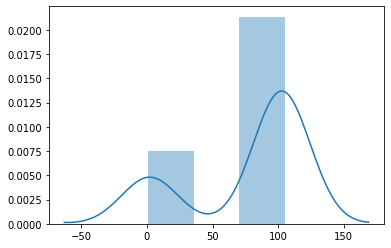

In [90]:
sns.distplot(n)

In [91]:
n.skew()

-1.160320804501543

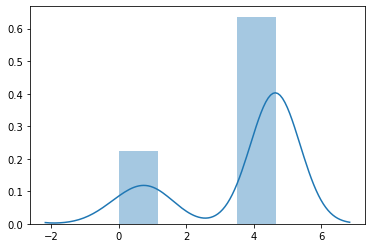

In [92]:
n1 = np.log(n)
sns.distplot(n1)

In [93]:
n1.skew()

-1.2295486853087012

In [94]:
n2 = np.sqrt(n)
n2.skew()

-1.1689621917801494